In [1]:
# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

International_Report_Departures.csv

In [2]:
# Loading File
def read_file(file, file_type):
    if (file_type == 'csv'):
        df = pd.read_csv(file)
    elif (file_type == 'xlsx'):
        df = pd.read_excel(file)
    elif (file_type == 'sql'):
        df = pd.read_sql(file)
    else:
        raise ValueError('Unsupported Format, Enter only csv, xlsx, or sql Files')
    return df

In [3]:
# Classifying Coloms 
def cols_types(df):
    for col in df.columns:
        if df[col].dtype.kind in 'iufc':
            num_cols.append(col)
        else:
            str_cols.append(col)

# Start Here!

In [4]:
file = input("Enter the file with its path, Please! ")

Enter the file with its path, Please! International_Report_Departures.csv


In [5]:
file_type = file.split(".")[-1]

In [6]:
df = read_file(file,file_type)

# Cleaning

In [7]:
print("The head of data.")
df.head()

The head of data.


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [8]:
df.shape

(930808, 16)

In [9]:
df.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [10]:
num_cols = len(df.columns)

In [11]:
df.dtypes

data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

In [12]:
num_cols = []
str_cols = []

In [13]:
cols_types(df)

In [14]:
num_cols

['Year',
 'Month',
 'usg_apt_id',
 'usg_wac',
 'fg_apt_id',
 'fg_wac',
 'airlineid',
 'carriergroup',
 'Scheduled',
 'Charter',
 'Total']

In [15]:
str_cols

['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']

In [16]:
df.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [17]:
# Fill Missing Values
for col in num_cols:
    df[col].fillna(df[col].mean(),inplace = True)     
for col in str_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [18]:
df.isna().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

# Visulalization

In [59]:
# Histogram Plot
def hist_plot(col):
    sns.histplot(df[col], bins=40, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title("Histogram of " + col , fontsize = 22)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

In [60]:
# Box Plot
def box_plot(col):
    sns.boxplot(data = df, x = col)
    plt.xlabel(col)
    plt.title("Box Plot of " + col , fontsize = 22)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

In [66]:
# Count Plot (top 10 Values)
def count_plot(col):
    fig, ax = plt.subplots(figsize = (20,15))
    sns.countplot(data = df, x = col, order = df[col].value_counts().iloc[:10].index, ax = ax)
    plt.title("Count Plot of " + col , fontsize = 22)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

In [65]:
# Pie Plot (top 10 Values)
def pie_plot(col):
    fig, ax = plt.subplots(figsize = (20,15))
    plt.pie(df[col].value_counts()[:10], labels = df[col].value_counts()[:10].index)
    plt.title("Pie Plot of " + col , fontsize = 22)
    plt.grid(True)
    plt.show()

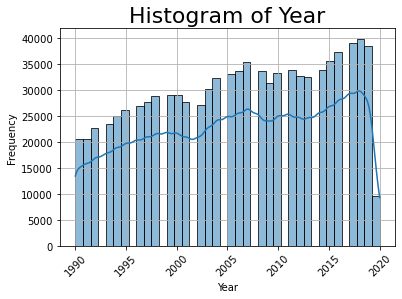

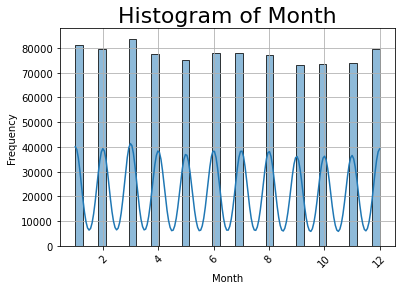

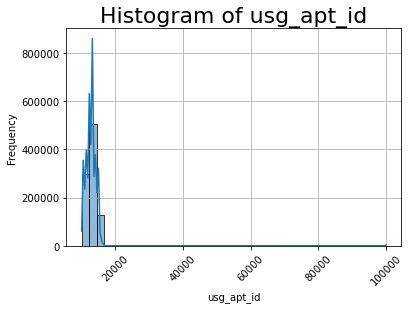

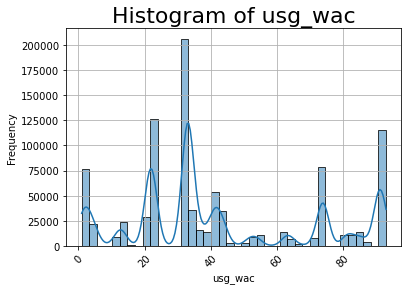

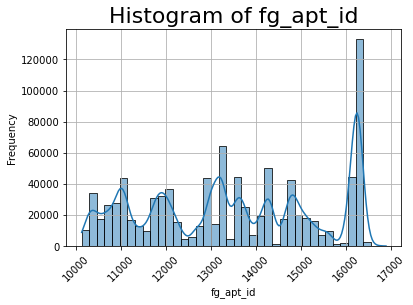

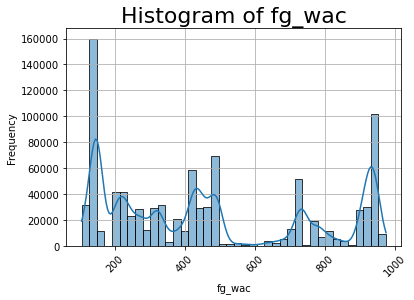

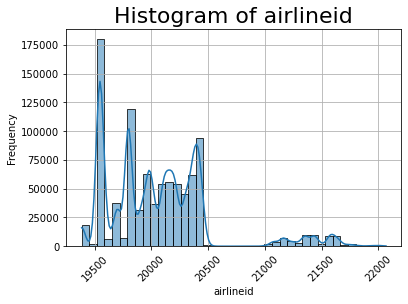

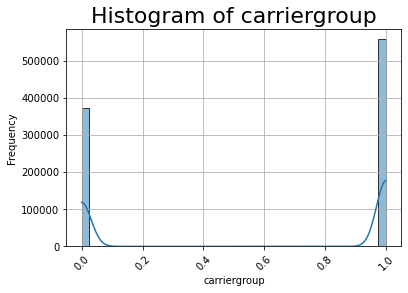

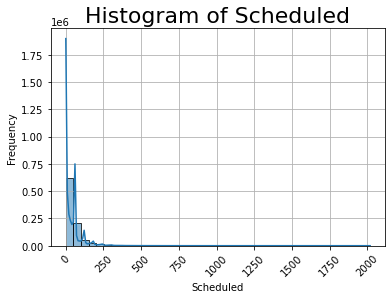

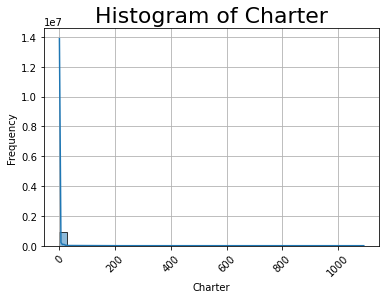

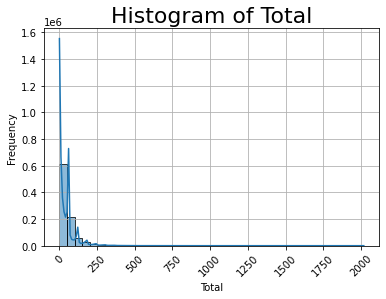

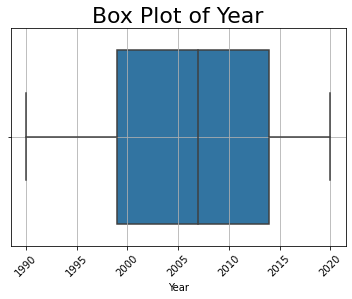

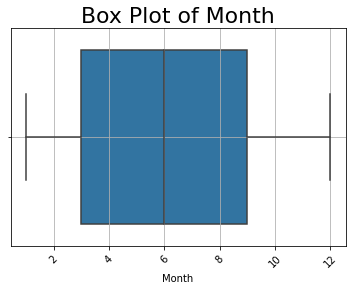

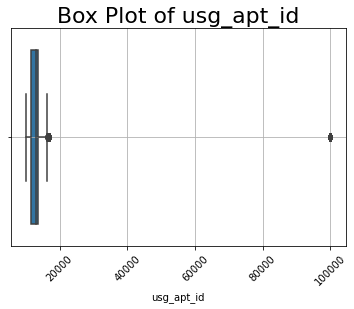

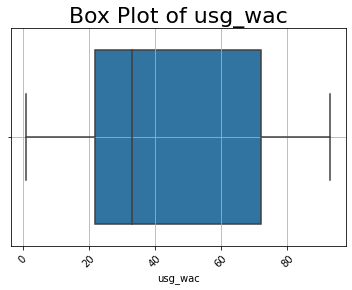

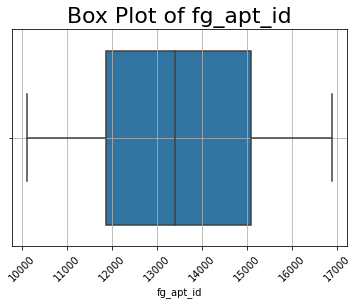

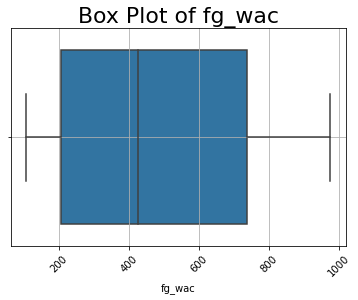

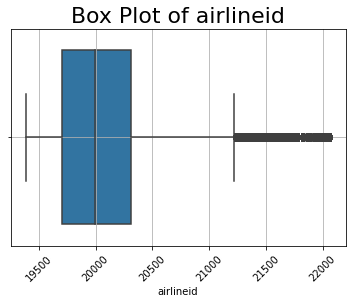

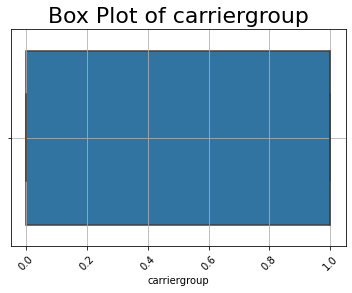

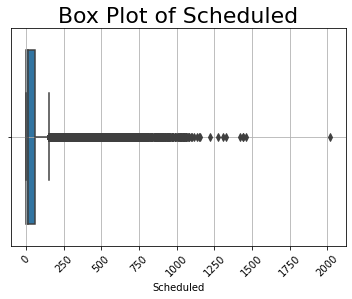

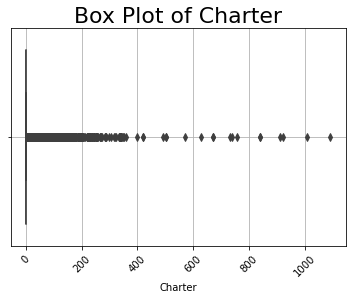

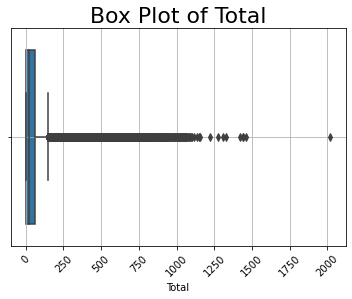

In [63]:
# Visualization of Numerical Features 
print("Histogram Plot")
for col in num_cols:
    hist_plot(col)
print("Box Plot")
for col in num_cols:
    box_plot(col)

Count Plot


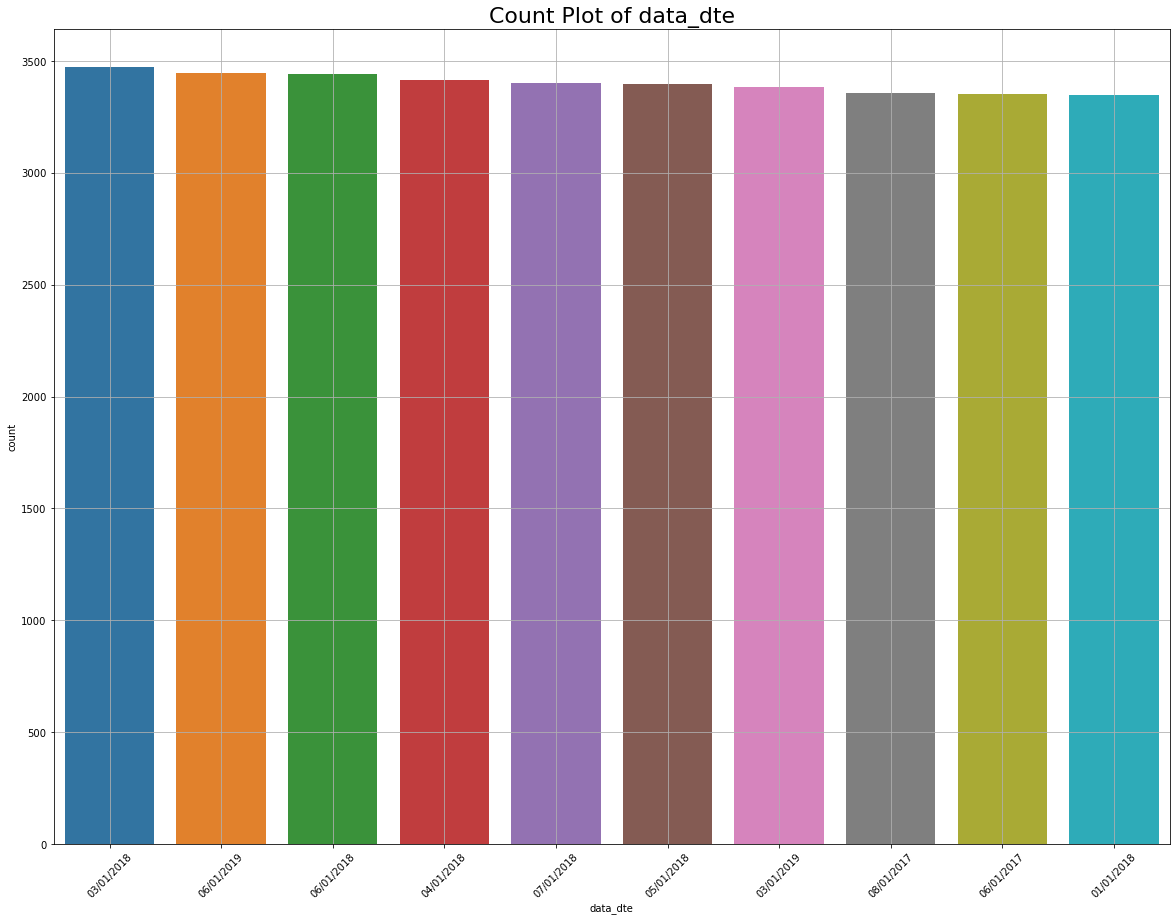

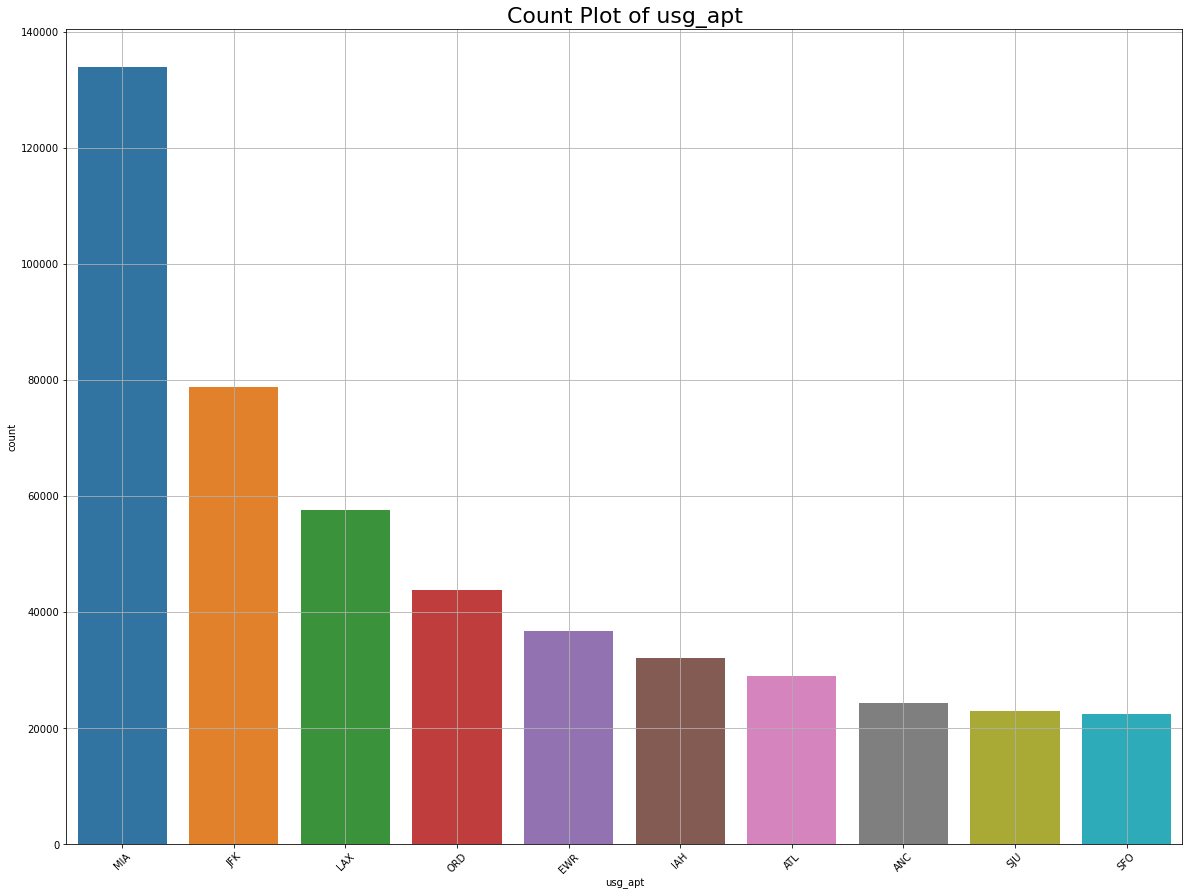

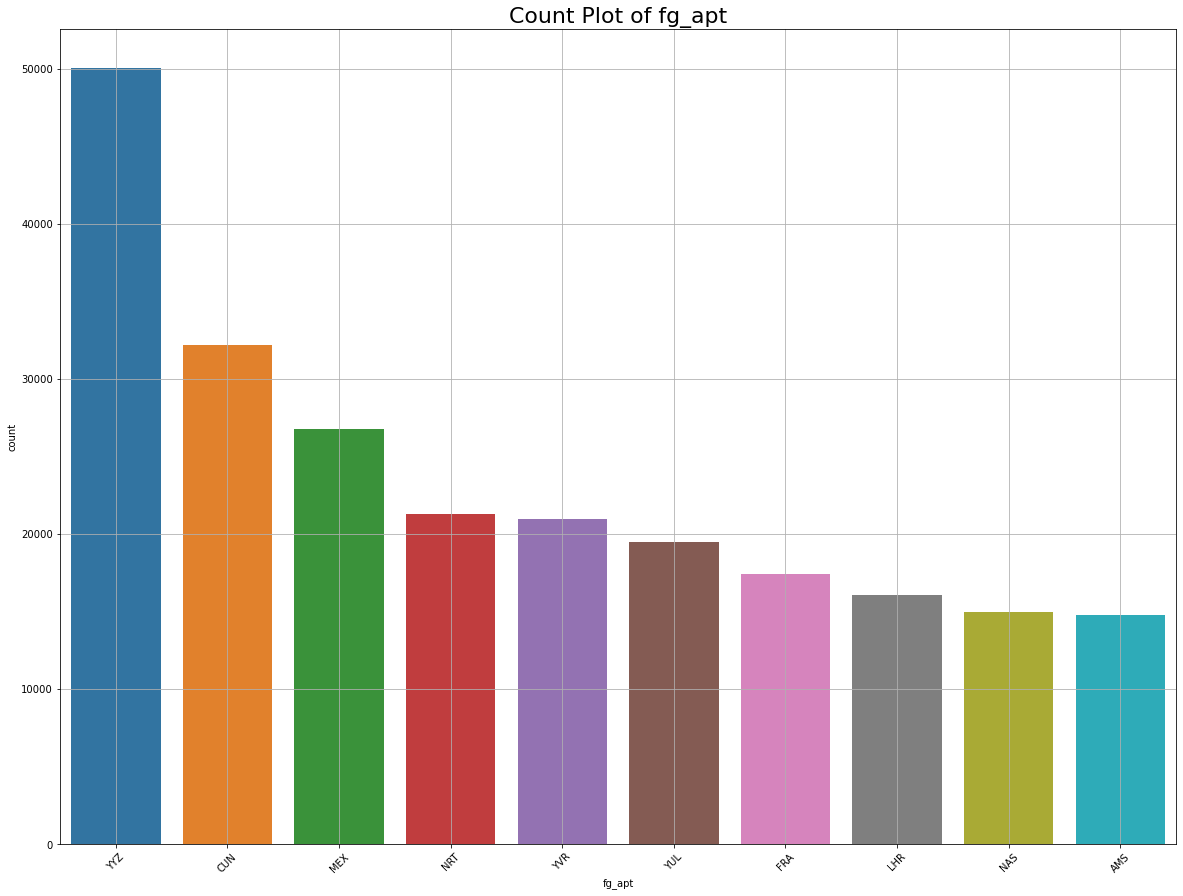

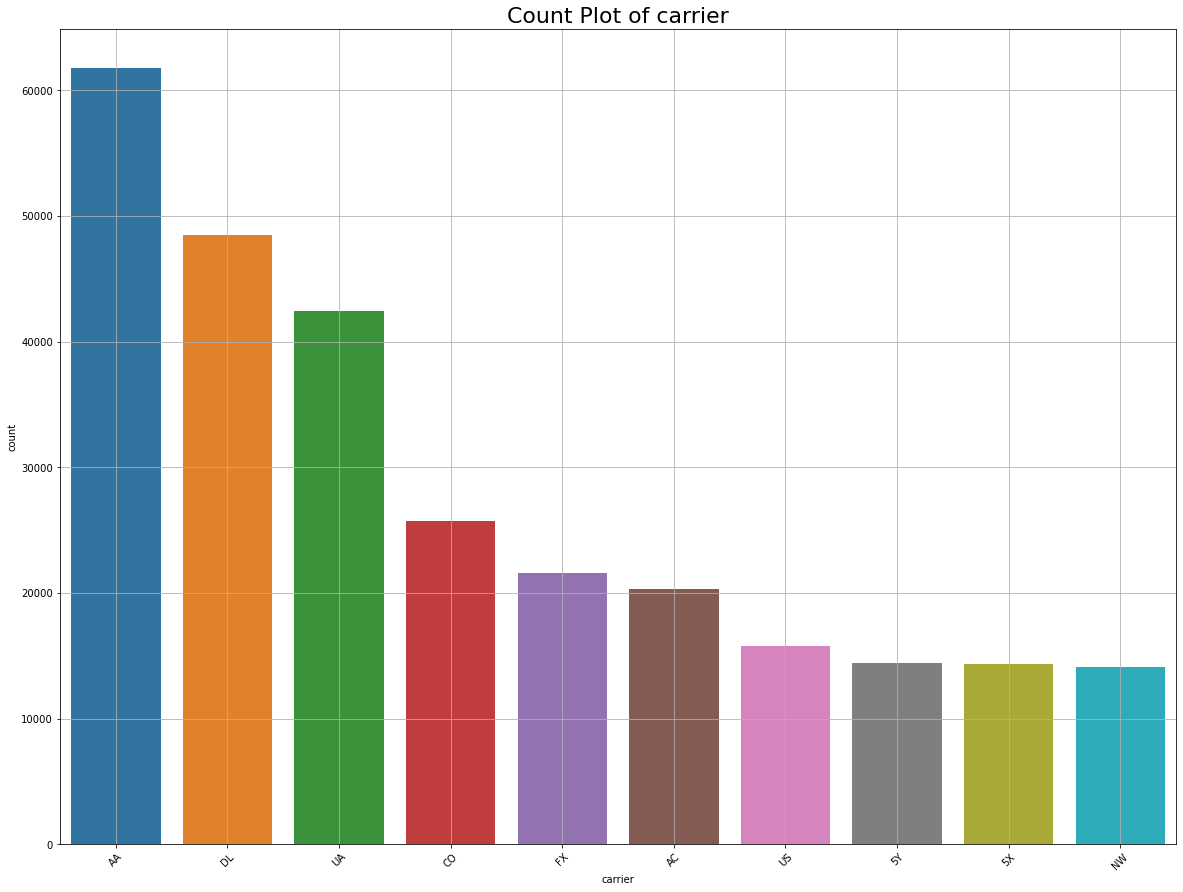

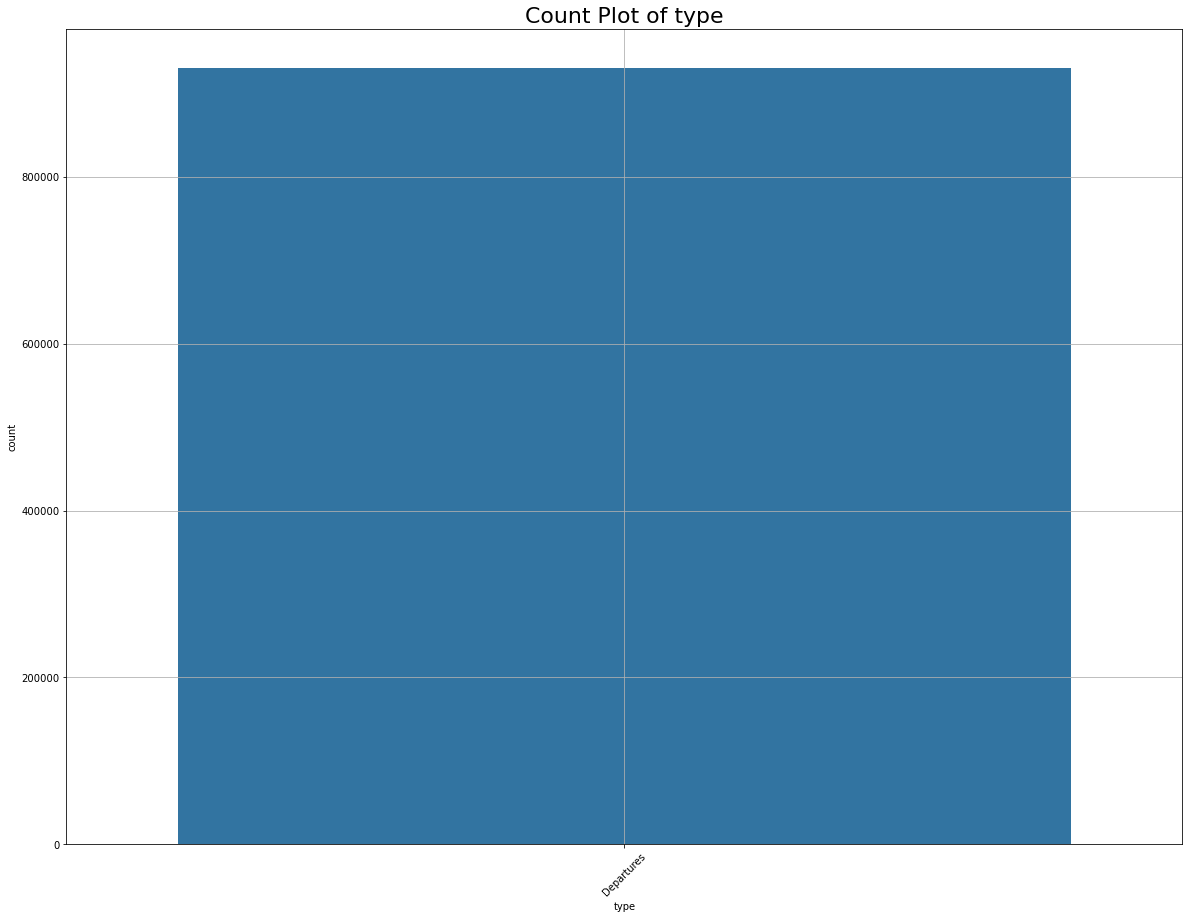

Pie Plot


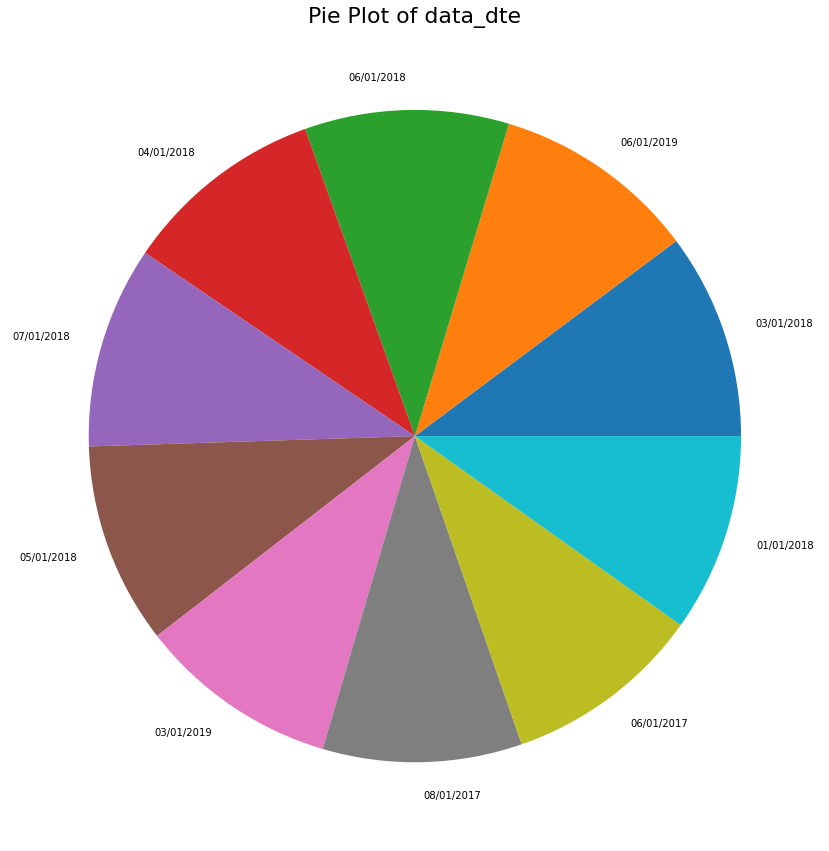

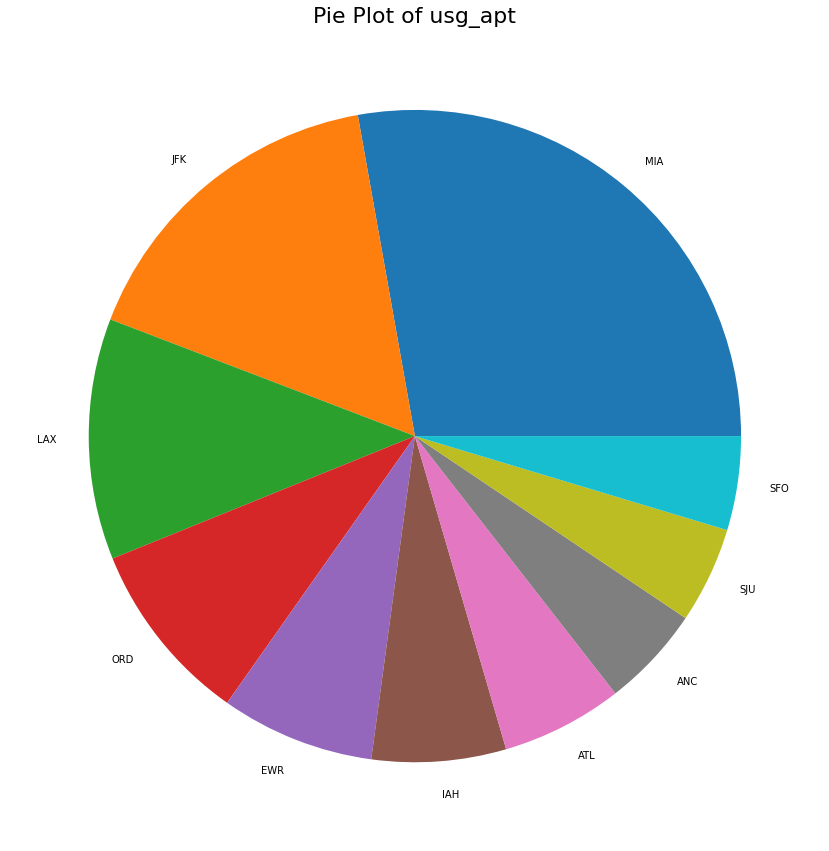

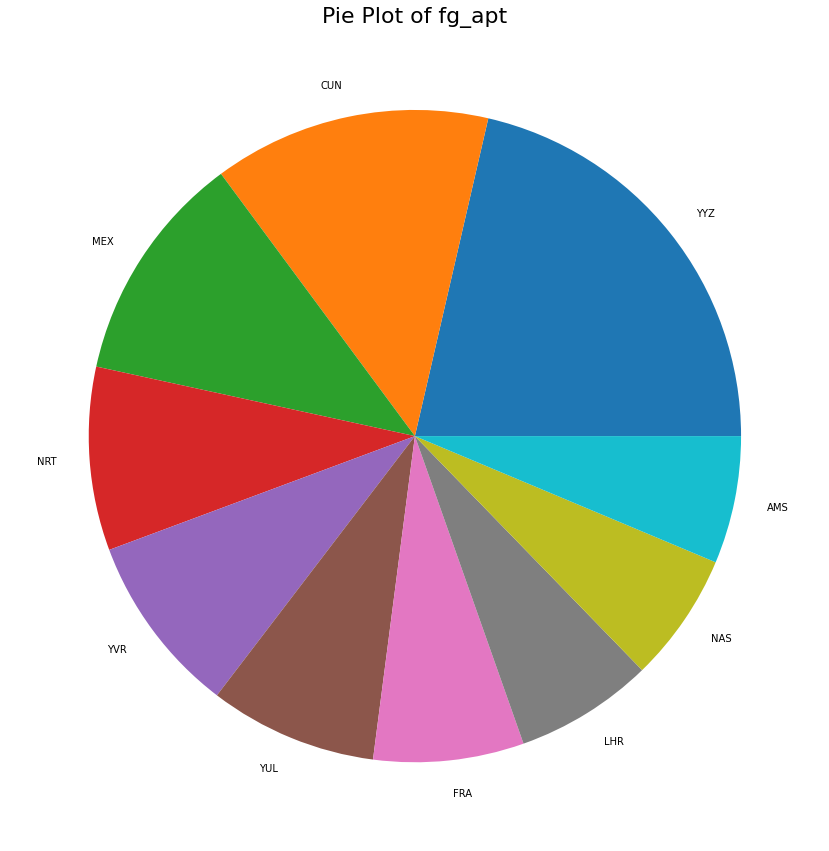

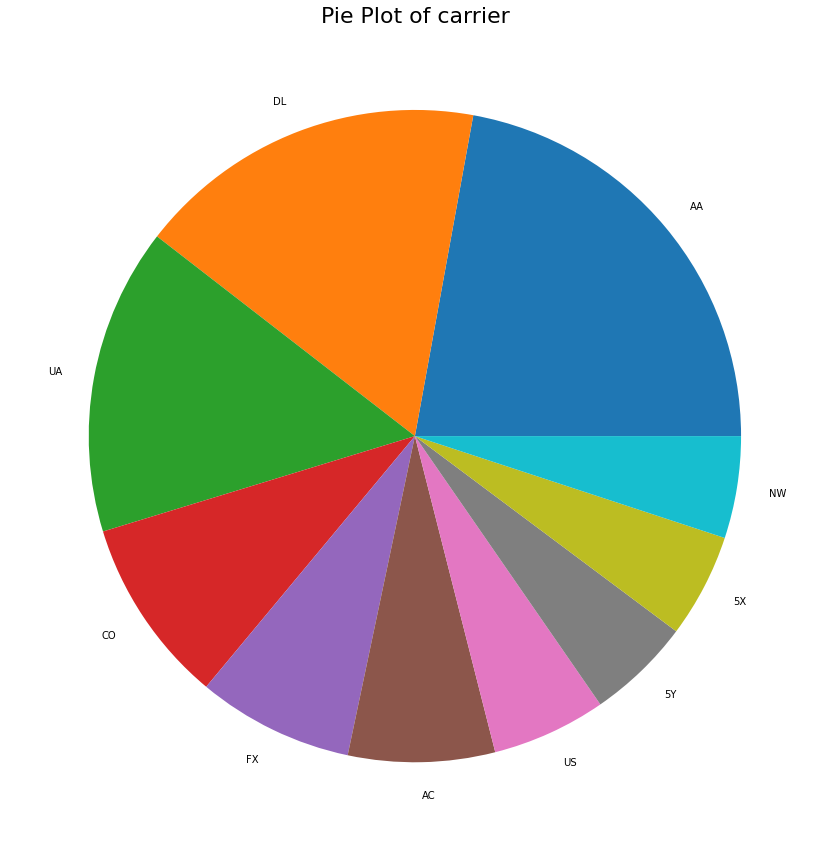

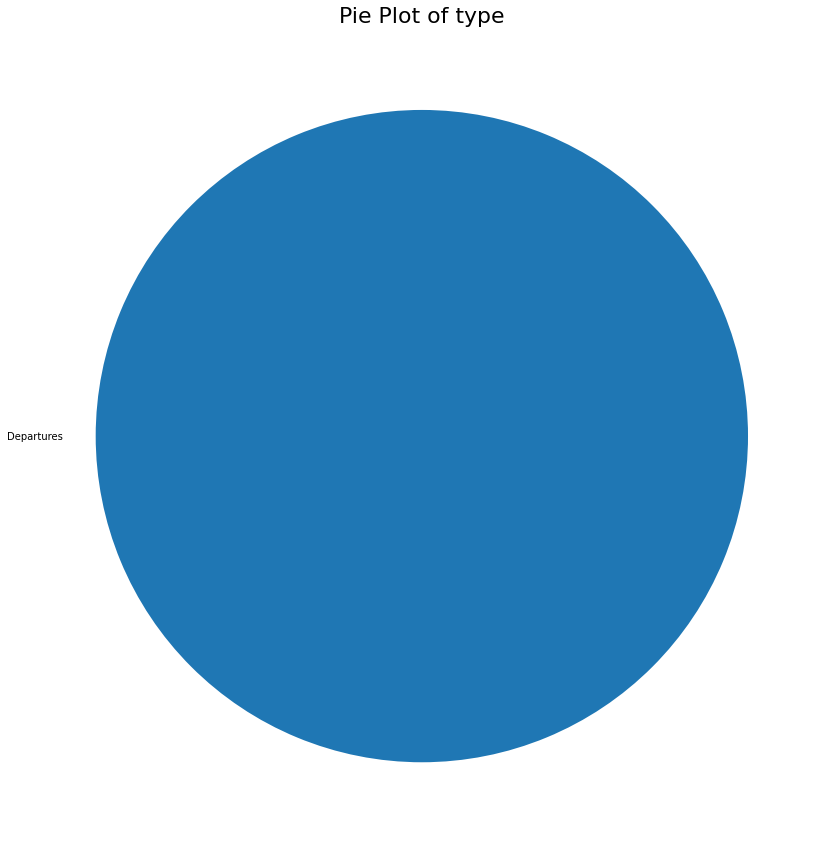

In [67]:
# Visualization of Categorical Features 
print("Count Plot")
for col in str_cols:
    count_plot(col)
print("Pie Plot")
for col in str_cols:
    pie_plot(col)

# Feature: 

1  - 'date_dte'   >>>> Date value.

2  - 'Yaer'       >>>> Year when the data was recorded.

3  - 'Month'      >>>> Month when the data was recorded.

4  - 'usg_apt_id' >>>> US Gateway Airport ID - assigned by US DOT to identify an airport.

5  - 'usg_apt'    >>>> US Gateway Airport Code - usually assigned by IATA, in absence of IATA, may show FAA-assigned code.

6  - 'usg_wac'    >>>> US Gateway World Area Code - assigned by US DOT to represent a geographic territory.

7  - 'fg_apt_id'  >>>> Foreign Gateway Airport ID - assigned by US DOT to identify an airport.

8  - 'fg_apt'     >>>> Foreign Gateway Airport Code - usually assigned by IATA, in absense of IATA, may show FAA-assigned code.

9  - 'fg_wac'     >>>> Foreign Gateway World Area Code - assigned by US DOT to represent a geographic territory.

10 - 'airlineid'  >>>> Airline ID - assigned by US DOT to identify an air carrier.

11 - 'carrier'    >>>> The organization which transporting passengers.

12 - 'carriergroup' >> Carrier group.

13 - 'Scheduled'  >>>> Flight follow a schedule set by the air carrier.

14 - 'Charter'    >>>> Flight does not follow a schedule set by the air carrier.

15 - 'Total'      >>>> Total Flights ( Scheduled + Charter)